# Ćwiczenia 1
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania 1 pkt


In [2]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

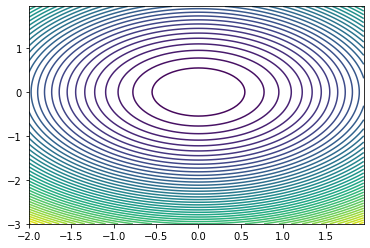

In [3]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

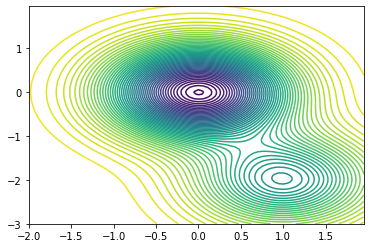

In [4]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

0.9845100612135291
-1.969020122418


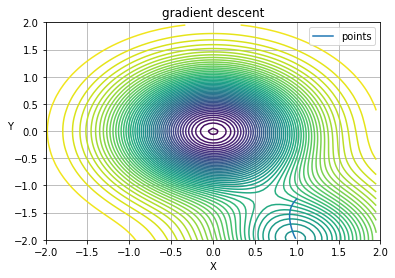

In [8]:
def f(x1, x2):
  return x1**2 + x2**2

def f_grad(x1, x2):
  return (2*x1, 2*x2)

def g(x1, x2):
  return 1.5 - np.exp(- x1**2 - x2**2) - 0.5 * np.exp(-(x1 - 1)**2 - (x2 + 2)**2)

def g_grad(x1, x2):
  return 2*x1*np.exp(-x1**2 - x2**2) + (x1 - 1)*np.exp(-(x1 - 1)**2 - (x2 + 2)**2 ), 2*x2*np.exp(- x1**2 - x2**2) + (x2 + 2)*np.exp(-(x1 - 1)**2 - (x2 + 2)**2)

class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace)>0:
            plt.scatter(self.trace[:,0], self.trace[:,1], s=10)

    def calculate_func_vale(self, x1:float, x2:float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
        gradient = self.calculate_func_grad(x1, x2)
        return self.alpha * gradient[0], self.alpha * gradient[1]

    def minimize(self, x1_init:float, x2_init:float, steps:int, verbose:int=0, plot:bool=False)->float:
        i = 0
        gradient = self.gradient_descent_step(x1_init, x2_init)
        epsilon = 10**-12
        self.trace = []
        while(i < steps and (abs(gradient[0]) > epsilon or abs(gradient[1]) > epsilon)):
          gradient = self.gradient_descent_step(x1_init, x2_init)
          x1_init -= gradient[0]
          x2_init -= gradient[1]
          i += 1
          self.trace.append((x1_init, x2_init))
          if(verbose >= 2):
            print((x1_init, x2_init))
        if(verbose >= 1):
          print(x1_init)
          print(x2_init)
        if(plot == True):
          self.generate_plot()
        return self.calculate_func_vale(x1_init, x2_init)

    def generate_plot(self):
          self._calc_Z_value()
          plt.figure()
          plt.contour(self.X, self.Y, self.Z, 50)
          traceX = [element[0] for element in self.trace]
          traceY = [element[1] for element in self.trace]
          plt.plot(traceX, traceY, label = "points")
          plt.title("gradient descent")
          plt.xlabel("X")
          plt.ylabel("Y", rotation=0)
          plt.legend()
          plt.grid(True) 
          plt.xlim([-2, 2])
          plt.ylim([-2, 2])
          plt.savefig("plot3.png")
          plt.show()


def main():
  x1 = 1
  x2 = -1.25
  alpha = 0.00192
  i = SimpleGradientDescent(g, g_grad, alpha)
  i.minimize(x1, x2, 1000000, 1, True)



if __name__ == '__main__':
    main()



# Funkcja 1

wartości dla wykresu:
  x1 = 4
  x2 = 4
  alpha = 0.001
  i = SimpleGradientDescent(f, f_grad, alpha)
  i.minimize(x1, x2, 1000000, 1, True)

  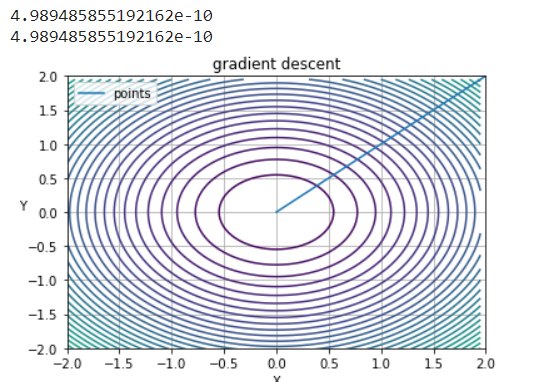

wartości dla wykresu:
  x1 = -1
  x2 = 2
  alpha = 0.0001
  i = SimpleGradientDescent(f, f_grad, alpha)
  i.minimize(x1, x2, 1000000, 1, True)
  
  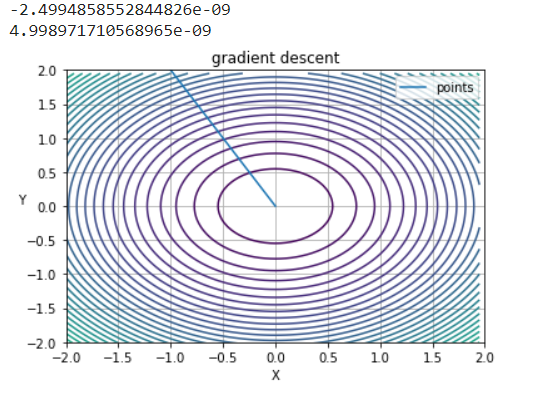

# Funkcja 2

wartości dla wykresu:
  x1 = 0.5
  x2 = 0.7
  alpha = 0.01
  i = SimpleGradientDescent(g, g_grad, alpha)
  i.minimize(x1, x2, 1000000, 1, True)

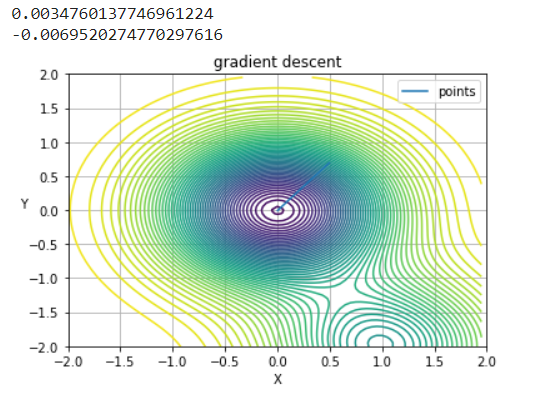

wartości dla wykresu:
  x1 = 1
  x2 = -1.25
  alpha = 0.00192
  i = SimpleGradientDescent(g, g_grad, alpha)
  i.minimize(x1, x2, 1000000, 1, True)

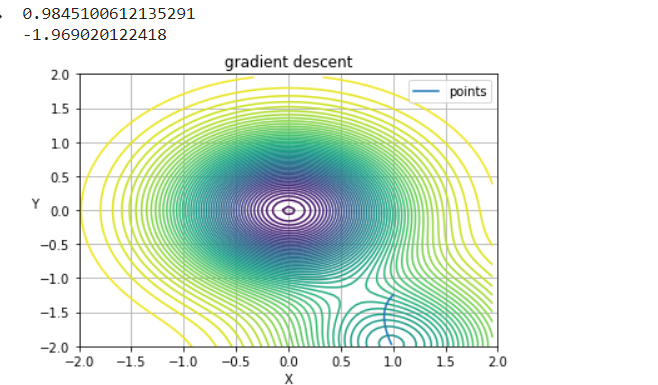
